<a href="https://colab.research.google.com/github/toriqultonu/Learning_PyTorch/blob/main/Perceptron_using_Epoch_%26_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Load the diabetes dataset
csv_file = '/content/drive/MyDrive/Neural Network/diabetes.csv'
df = pd.read_csv(csv_file)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Split the data into features (X) and target (y)
X = df.iloc[:, :-1].values
y = df['Outcome'].values


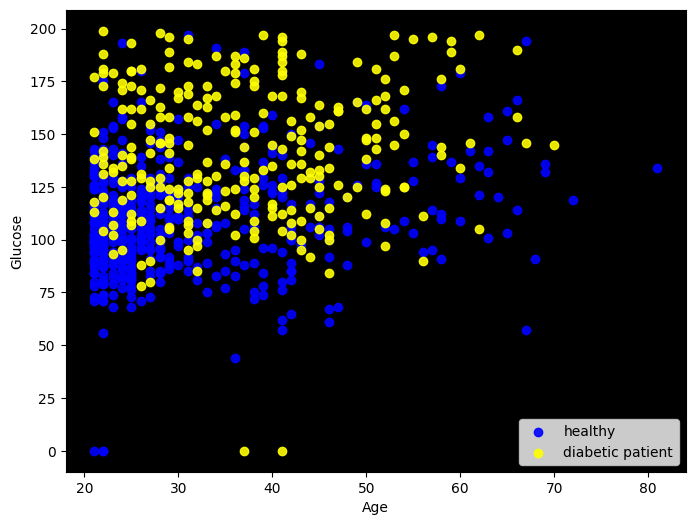

In [ ]:
diabetic_patients = df[df.Outcome == 1]
healthy_people = df[df.Outcome == 0]
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('white')  # Set the background color of the figure to black
ax.set_facecolor('black')
plt.scatter(healthy_people.Age, healthy_people.Glucose, color = 'blue', label='healthy', alpha = .9)
plt.scatter(diabetic_patients.Age, diabetic_patients.Glucose, color = 'yellow', label='diabetic patient', alpha = 0.9)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

In [ ]:

# Split the data into a training set and a testing set (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(691, 8)
(77, 8)
(691,)
(77,)


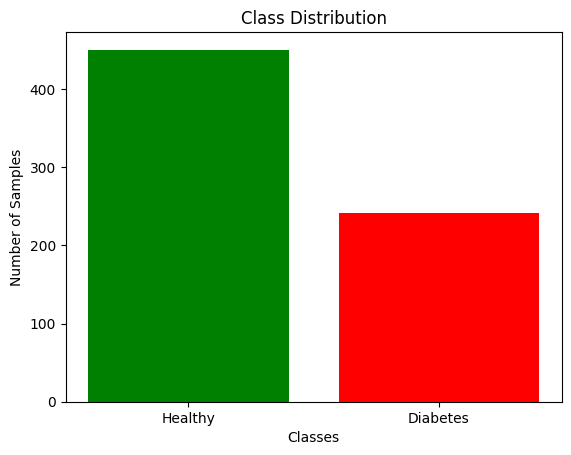

In [ ]:
healthy = 0
diabetes = 0
for i in y_train:
    if i == 0:
        healthy += 1
    else:
        diabetes += 1

# Create a bar chart for the class distribution
labels = ['Healthy', 'Diabetes']
counts = [healthy, diabetes]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


In [ ]:

# from imblearn.over_sampling import SMOTE

# # Count the number of samples in each class
# healthy = sum(y_train == 0)
# diabetes = sum(y_train == 1)

# # Oversample the minority class (diabetes) using SMOTE
# if diabetes < healthy:
#     smote = SMOTE(sampling_strategy='auto', random_state=42)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# else:
#     X_train_resampled, y_train_resampled = X_train, y_train
# X_train=X_train_resampled
# y_train=y_train_resampled
# # Check the number of samples after oversampling
# print("Number of samples in each class after oversampling:")
# print("Healthy:", sum(y_train== 0))
# print("Diabetes:", sum(y_train == 1))


Number of samples in each class after oversampling:
Healthy: 450
Diabetes: 450


In [ ]:
def perceptron_algo(weight,epochs, batch_size, learning_rate, X_train, y_train):
    num_features = X_train.shape[1]
    num_samples = X_train.shape[0]
    # weight = np.zeros(num_features)  # Initialize weights to zeros
    T = 0.5

    for epoch in range(epochs):
        for i in range(0, num_samples, batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            for j in range(len(x_batch)):
                x = x_batch[j]
                y = y_batch[j]

                decision = np.dot(x, weight)  # Compute the decision boundary
                output = 1 if decision > T else 0

                # Update weights if the prediction is incorrect
                if output != y:
                    weight += learning_rate * (y - output) * x

    return weight


In [ ]:
def test(weight, T, X_test, y_test):
    num_samples = X_test.shape[0]
    accurate_count = 0

    for i in range(num_samples):
        x = X_test[i]
        decision = np.dot(x, weight)
        output = 1 if decision > T else 0

        if output == y_test[i]:
            accurate_count += 1

    return accurate_count


In [ ]:
# Specify hyperparameters
epochs = 10
batch_size = 32
learning_rate = 0.1
weight = [0.5, 0.2, 0.4, 0.8, 0.5, 0.6, 0.3, 0.1]
# Train the perceptron model
trained_weight = perceptron_algo(weight,epochs, batch_size, learning_rate, X_train, y_train)
print(trained_weight)


[114.2      7.     -41.6     -3.5      7.4    -10.46     4.7006   1.7   ]


In [ ]:
# Test the model on the testing data
accurate = test(trained_weight, 0.0, X_test, y_test)

# Calculate accuracy
total = len(y_test)
accuracy = (accurate / total) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 70.13%
